In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.cluster import KMeans 
import seaborn as sns
from scipy import stats

In [9]:
df_bank = pd.read_csv('bank_marketing_part1_Data.csv')

### 1.1 Initial Analysis Steps

In [10]:
df_bank.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837


In [11]:
df_bank.shape

(210, 7)

In [12]:
df_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   spending                      210 non-null    float64
 1   advance_payments              210 non-null    float64
 2   probability_of_full_payment   210 non-null    float64
 3   current_balance               210 non-null    float64
 4   credit_limit                  210 non-null    float64
 5   min_payment_amt               210 non-null    float64
 6   max_spent_in_single_shopping  210 non-null    float64
dtypes: float64(7)
memory usage: 11.6 KB


In [15]:
df_bank.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
spending,210.0,14.847524,2.909699,10.5900,12.27000,14.35500,17.305000,21.1800
advance_payments,210.0,14.559286,1.305959,12.4100,13.45000,14.32000,15.715000,17.2500
probability_of_full_payment,210.0,0.870999,0.023629,0.8081,0.85690,0.87345,0.887775,0.9183
current_balance,210.0,5.628533,0.443063,4.8990,5.26225,5.52350,5.979750,6.6750
credit_limit,210.0,3.258605,0.377714,2.6300,2.94400,3.23700,3.561750,4.0330
min_payment_amt,210.0,3.700201,1.503557,0.7651,2.56150,3.59900,4.768750,8.4560
max_spent_in_single_shopping,210.0,5.408071,0.491480,4.5190,5.04500,5.22300,5.877000,6.5500


In [17]:
df_bank.isnull().sum()

spending                        0
advance_payments                0
probability_of_full_payment     0
current_balance                 0
credit_limit                    0
min_payment_amt                 0
max_spent_in_single_shopping    0
dtype: int64

In [19]:
df_bank.duplicated().sort_values(ascending=False)

0      False
157    False
133    False
134    False
135    False
       ...  
73     False
74     False
75     False
76     False
209    False
Length: 210, dtype: bool

## Univariate Analysis

In [20]:
df_bank.columns

Index(['spending', 'advance_payments', 'probability_of_full_payment',
       'current_balance', 'credit_limit', 'min_payment_amt',
       'max_spent_in_single_shopping'],
      dtype='object')

<AxesSubplot:>

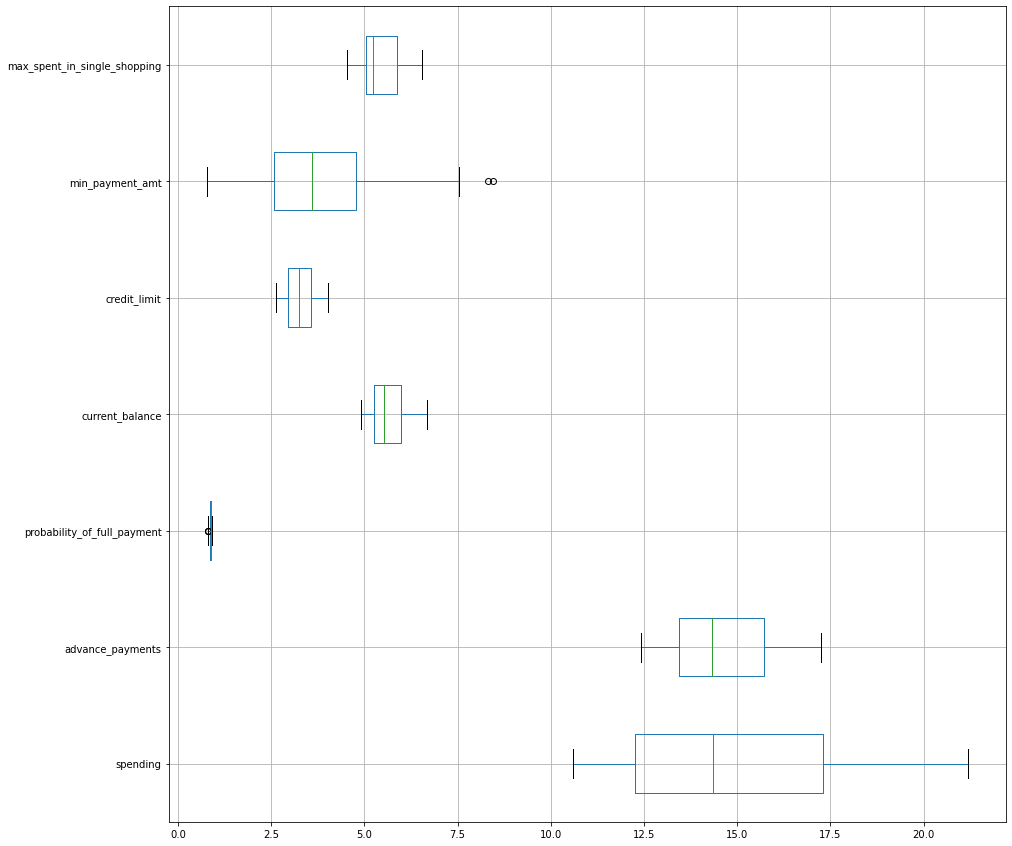

In [23]:
# construct box plot for continuous variables
plt.figure(figsize=(15,15))
df_bank[['spending', 'advance_payments', 'probability_of_full_payment',
       'current_balance', 'credit_limit', 'min_payment_amt',
       'max_spent_in_single_shopping']].boxplot(vert=0)

In [24]:
df_bank.columns

Index(['spending', 'advance_payments', 'probability_of_full_payment',
       'current_balance', 'credit_limit', 'min_payment_amt',
       'max_spent_in_single_shopping'],
      dtype='object')

C:\Users\rakes\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\rakes\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\rakes\anaconda3\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\rakes\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and 

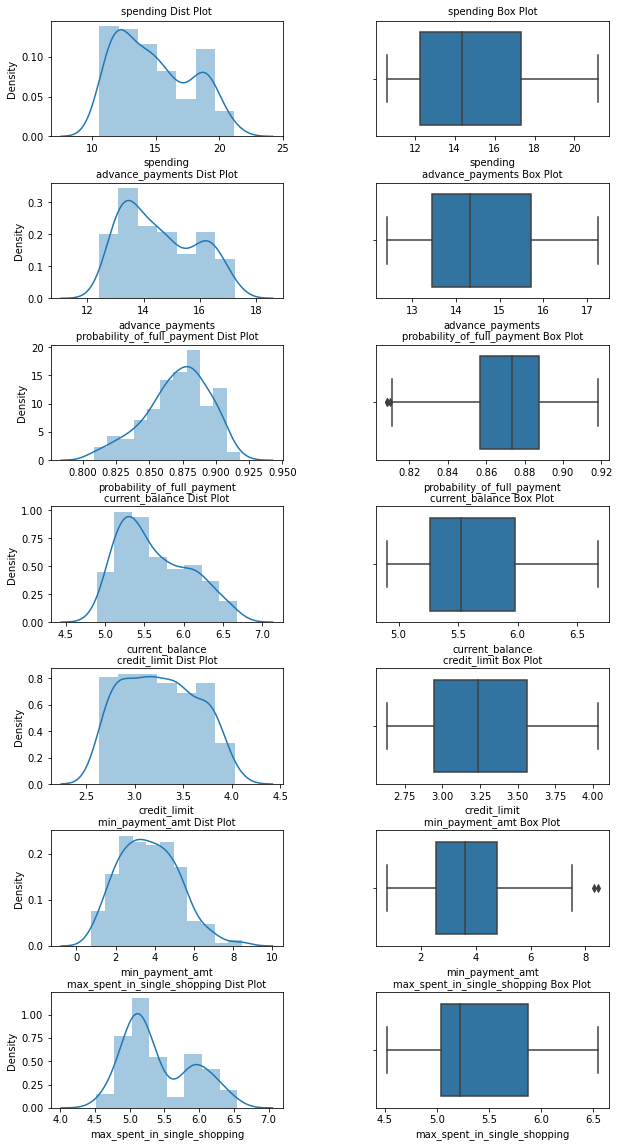

In [35]:
fig , axes= plt.subplots(nrows=7,ncols=2)
plt.subplots_adjust(wspace=0.4,
                   hspace = 0.4)
fig.set_size_inches(10, 20)

spending = sns.distplot(df_bank['spending'],ax=axes[0][0])
spending.set_title("spending Dist Plot", fontsize = 10)
spending = sns.boxplot(df_bank['spending'], orient = "v",ax=axes[0][1])
spending.set_title("spending Box Plot", fontsize = 10)

advance_payments = sns.distplot(df_bank['advance_payments'],ax=axes[1][0])
advance_payments.set_title("advance_payments Dist Plot", fontsize = 10)
advance_payments = sns.boxplot(df_bank['advance_payments'], orient = "v",ax=axes[1][1])
advance_payments.set_title("advance_payments Box Plot", fontsize = 10)

probability_of_full_payment = sns.distplot(df_bank['probability_of_full_payment'],ax=axes[2][0])
probability_of_full_payment.set_title("probability_of_full_payment Dist Plot", fontsize = 10)
probability_of_full_payment = sns.boxplot(df_bank['probability_of_full_payment'], orient = "v",ax=axes[2][1])
probability_of_full_payment.set_title("probability_of_full_payment Box Plot", fontsize = 10)

current_balance = sns.distplot(df_bank['current_balance'],ax=axes[3][0])
current_balance.set_title("current_balance Dist Plot", fontsize = 10)
current_balance = sns.boxplot(df_bank['current_balance'], orient = "v",ax=axes[3][1])
current_balance.set_title("current_balance Box Plot", fontsize = 10)

credit_limit = sns.distplot(df_bank['credit_limit'],ax=axes[4][0])
credit_limit.set_title("credit_limit Dist Plot", fontsize = 10)
credit_limit = sns.boxplot(df_bank['credit_limit'], orient = "v",ax=axes[4][1])
credit_limit.set_title("credit_limit Box Plot", fontsize = 10)

min_payment_amt = sns.distplot(df_bank['min_payment_amt'],ax=axes[5][0])
min_payment_amt.set_title("min_payment_amt Dist Plot", fontsize = 10)
min_payment_amt = sns.boxplot(df_bank['min_payment_amt'], orient = "v",ax=axes[5][1])
min_payment_amt.set_title("min_payment_amt Box Plot", fontsize = 10)

max_spent_in_single_shopping = sns.distplot(df_bank['max_spent_in_single_shopping'],ax=axes[6][0])
max_spent_in_single_shopping.set_title("max_spent_in_single_shopping Dist Plot", fontsize = 10)
max_spent_in_single_shopping = sns.boxplot(df_bank['max_spent_in_single_shopping'], orient = "v",ax=axes[6][1])
max_spent_in_single_shopping.set_title("max_spent_in_single_shopping Box Plot", fontsize = 10)

plt.show()

### Bivariate Analysis

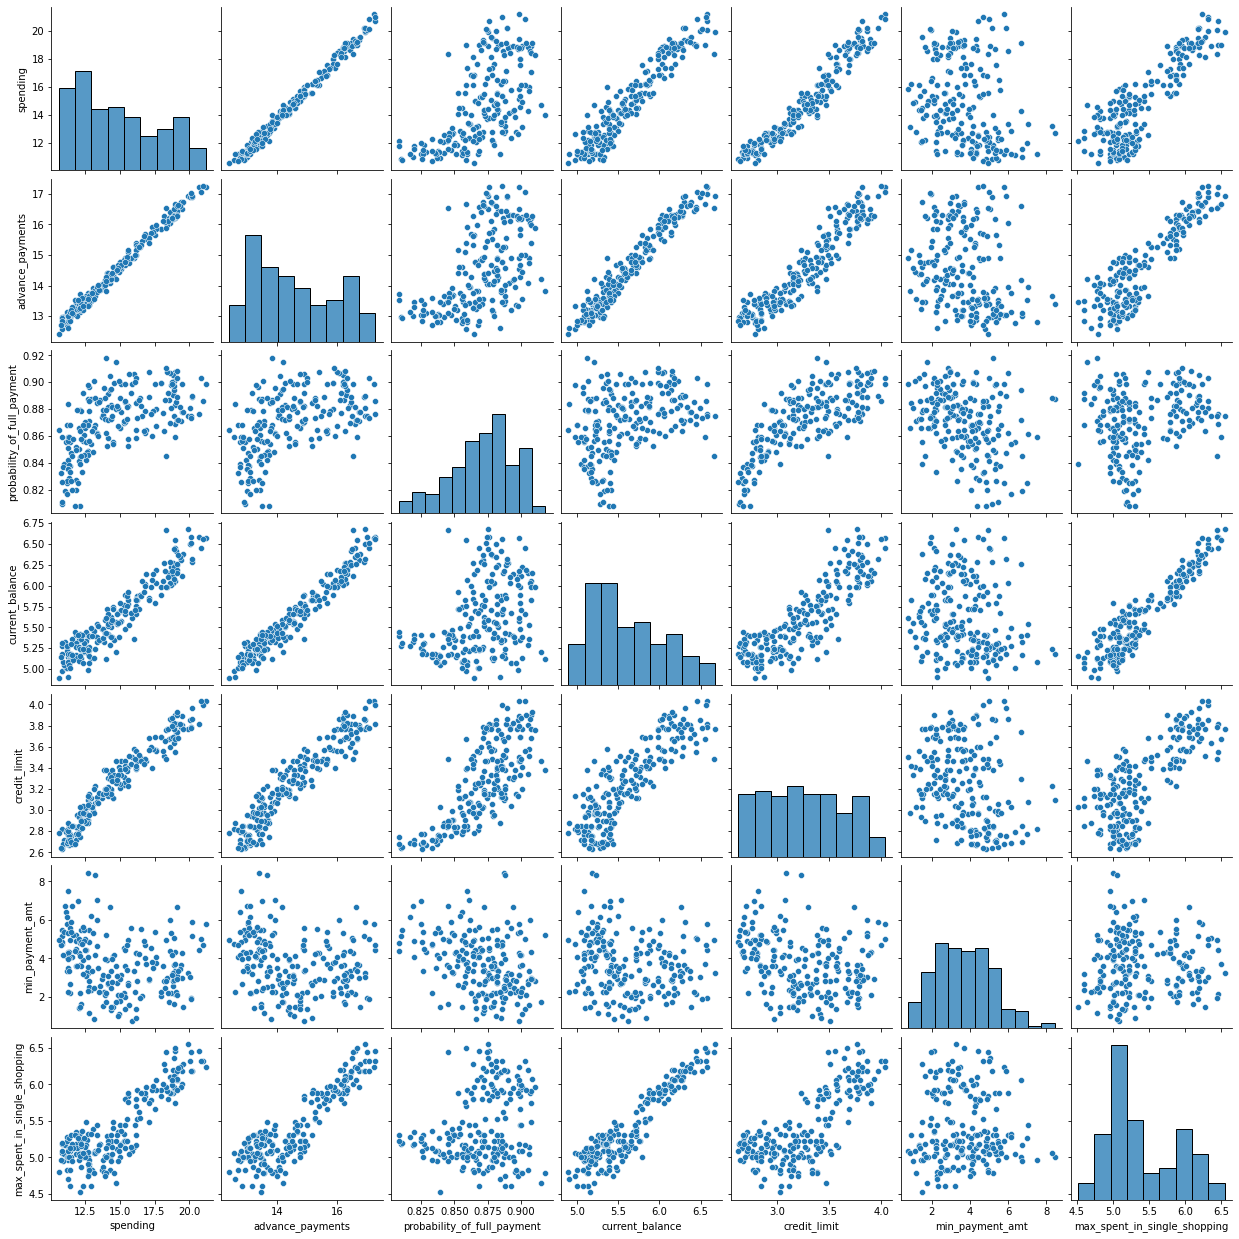

In [36]:
sns.pairplot(df_bank)

### Multivariate analysis

<AxesSubplot:>

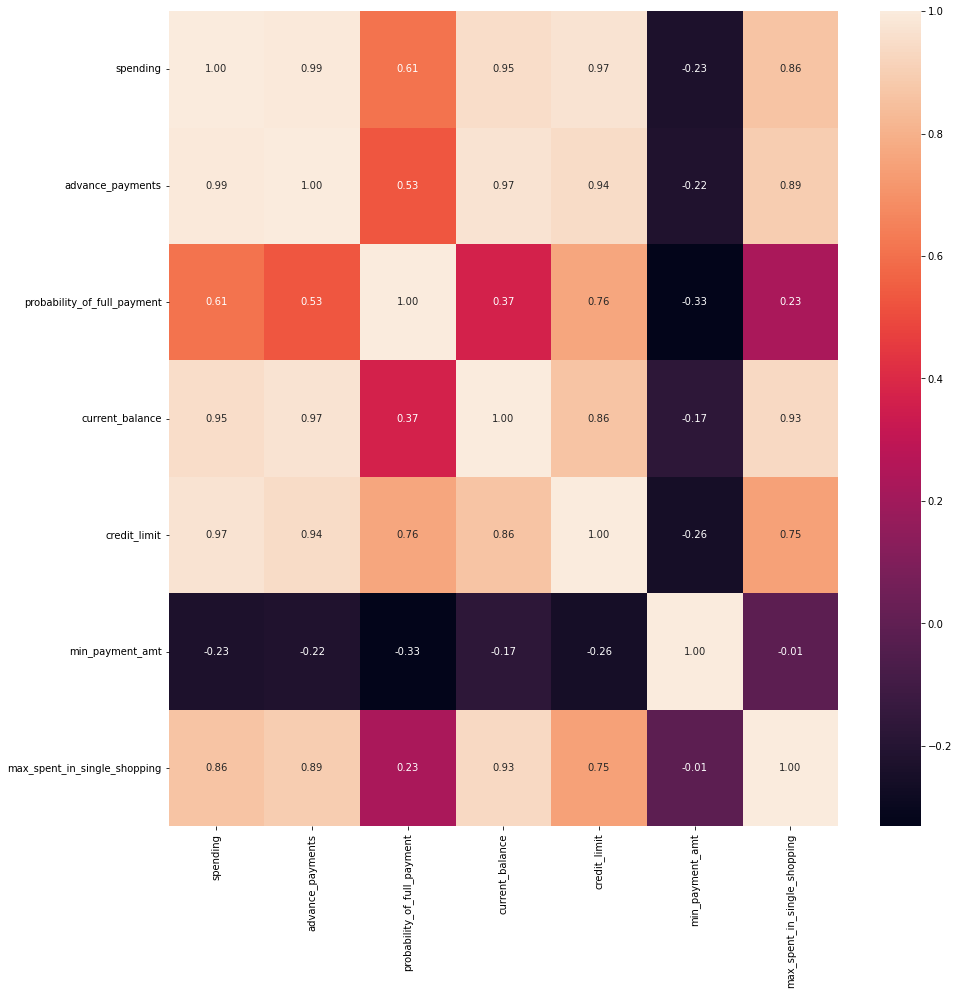

In [37]:
plt.figure(figsize=(15,15))
sns.heatmap(df_bank.corr(),annot=True,fmt=".2f")

In [38]:
df_bank_clean=df_bank.copy()

In [62]:
df_bank.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837


### 1.2 Scaling

In [39]:
from scipy.stats import zscore
data_scaled=df_bank.apply(zscore)
data_scaled.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,1.754355,1.811968,0.178230,2.367533,1.338579,-0.298806,2.328998
1,0.393582,0.253840,1.501773,-0.600744,0.858236,-0.242805,-0.538582
2,1.413300,1.428192,0.504874,1.401485,1.317348,-0.221471,1.509107
3,-1.384034,-1.227533,-2.591878,-0.793049,-1.639017,0.987884,-0.454961
4,1.082581,0.998364,1.196340,0.591544,1.155464,-1.088154,0.874813


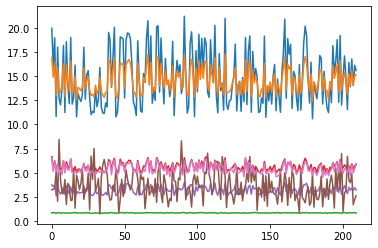

In [41]:
plt.plot(df_bank)
plt.show()

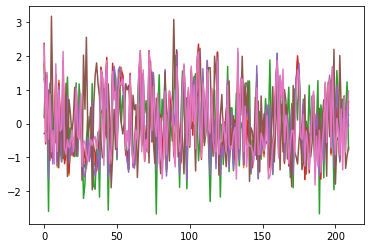

In [43]:
plt.plot(data_scaled)
plt.show()

### Outlier Treatment

In [44]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [45]:
feature_list = data_scaled.columns
for i in feature_list:
    lr,ur=remove_outlier(data_scaled[i])
    data_scaled[i]=np.where(data_scaled[i] > ur , ur , data_scaled[i])
    data_scaled[i]=np.where(data_scaled[i] < lr , lr , data_scaled[i])
print("lower range",lr, "and upper range", ur)

lower range -3.285829387030455 and upper range 3.5017282631811546


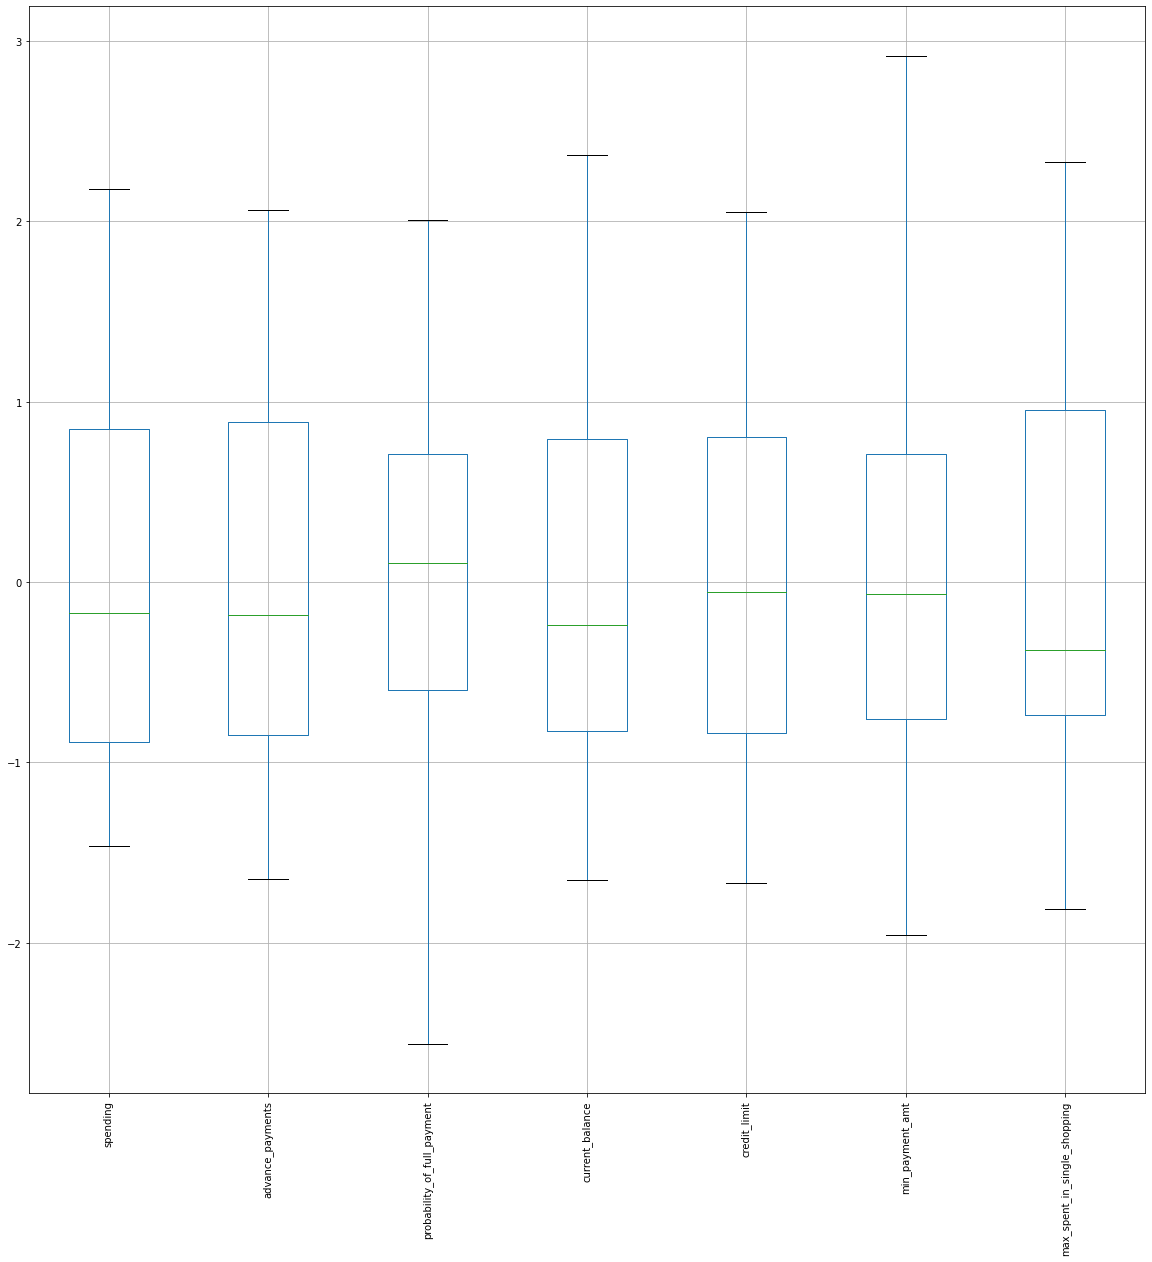

In [46]:
data_scaled.boxplot(figsize=(20,20))
plt.xticks(rotation=90)
plt.show()

### 1.3 Hierarchical Clustering

In [47]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [54]:
data_scaled.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,1.754355,1.811968,0.178230,2.367533,1.338579,-0.298806,2.328998
1,0.393582,0.253840,1.501773,-0.600744,0.858236,-0.242805,-0.538582
2,1.413300,1.428192,0.504874,1.401485,1.317348,-0.221471,1.509107
3,-1.384034,-1.227533,-2.562713,-0.793049,-1.639017,0.987884,-0.454961
4,1.082581,0.998364,1.196340,0.591544,1.155464,-1.088154,0.874813


In [122]:
wardlink = linkage(data_scaled, method = 'ward')

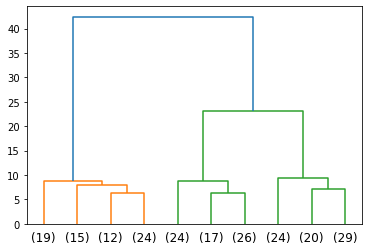

In [150]:
dend = dendrogram(wardlink,
                 truncate_mode='lastp',
                 p = 10,
                 )

In [124]:
from scipy.cluster.hierarchy import fcluster

In [180]:
clusters_ward = fcluster(wardlink, 5, criterion='maxclust')
clusters_ward

array([2, 5, 2, 3, 2, 3, 3, 4, 2, 3, 2, 5, 3, 2, 4, 3, 5, 3, 4, 3, 3, 3,
       2, 3, 5, 1, 4, 3, 3, 3, 4, 3, 3, 5, 3, 3, 3, 3, 3, 2, 2, 5, 1, 2,
       3, 3, 4, 2, 2, 2, 3, 2, 2, 2, 2, 1, 3, 3, 3, 1, 5, 3, 3, 5, 5, 2,
       2, 5, 2, 3, 4, 3, 2, 2, 3, 2, 5, 3, 1, 5, 5, 4, 5, 2, 3, 5, 5, 1,
       1, 3, 5, 2, 5, 3, 3, 2, 2, 1, 3, 1, 3, 2, 5, 2, 5, 2, 2, 3, 3, 2,
       5, 5, 2, 3, 3, 1, 4, 5, 3, 2, 4, 3, 3, 3, 5, 5, 2, 3, 5, 5, 3, 5,
       4, 2, 3, 1, 2, 3, 2, 5, 5, 5, 3, 3, 4, 3, 2, 3, 4, 3, 5, 3, 5, 5,
       4, 5, 4, 3, 5, 1, 2, 3, 2, 1, 2, 3, 1, 5, 4, 4, 5, 3, 5, 2, 2, 2,
       5, 4, 2, 3, 5, 4, 4, 5, 2, 1, 4, 5, 4, 3, 4, 5, 3, 1, 5, 1, 2, 3,
       2, 3, 5, 2, 5, 3, 1, 5, 1, 4, 2, 5], dtype=int32)

In [170]:
df_bank_hi_cluster = df_bank.copy()

In [181]:
df_bank_hi_cluster['clusters_ward'] = clusters_ward

In [182]:
df_bank_hi_cluster.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,clusters_ward
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,2
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,5
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,2
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,3
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,2


In [183]:
df_bank_hi_cluster['clusters_ward'].value_counts().sort_index()

1    19
2    51
3    67
4    24
5    49
Name: clusters_ward, dtype: int64

In [184]:
aggdata_ward=df_bank_hi_cluster.groupby('clusters_ward').mean()
aggdata_ward['Freq']=df_bank_hi_cluster['clusters_ward'].value_counts().sort_index()
aggdata_ward


,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Freq
clusters_ward,,,,,,,,
1,16.801579,15.544737,0.873184,5.970789,3.476368,4.275368,5.860737,19
2,18.956275,16.369216,0.888578,6.227980,3.762216,3.402137,6.075725,51
3,11.872388,13.257015,0.848072,5.238940,2.848537,4.949433,5.122209,67
4,12.798750,13.565417,0.873312,5.254458,3.040000,2.371129,4.894000,24
5,14.884898,14.560816,0.882069,5.587837,3.317776,2.730247,5.180306,49


In [131]:
### Average method

In [109]:
link_method_avg = linkage(data_scaled, method = 'average')

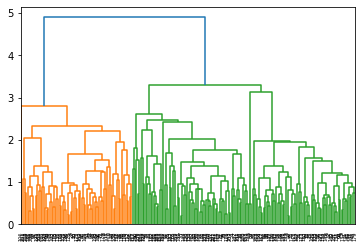

In [110]:
dend_avg = dendrogram(link_method_avg)

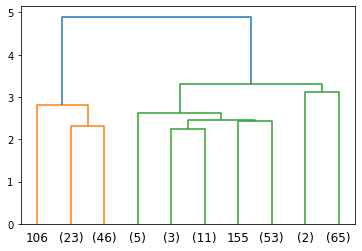

In [111]:
dend = dendrogram(link_method_avg,
                 truncate_mode='lastp',
                 p = 10,
                 )

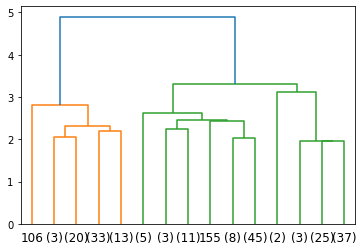

In [151]:
dend = dendrogram(link_method_avg,
                 truncate_mode='lastp',
                 p = 15,
                 )

In [288]:
clusters_avg = fcluster(link_method_avg, 3, criterion='maxclust')
clusters_avg

array([1, 2, 1, 3, 1, 3, 3, 2, 1, 3, 1, 2, 3, 1, 2, 3, 2, 3, 2, 3, 3, 3,
       1, 3, 2, 1, 2, 3, 3, 3, 2, 3, 3, 2, 3, 3, 3, 3, 3, 1, 1, 2, 1, 1,
       3, 3, 2, 1, 1, 1, 3, 1, 1, 1, 1, 1, 3, 3, 3, 1, 2, 3, 3, 2, 2, 1,
       1, 2, 1, 3, 2, 3, 1, 1, 3, 1, 2, 3, 1, 2, 2, 2, 2, 1, 3, 2, 2, 1,
       1, 3, 2, 1, 2, 3, 3, 1, 1, 1, 3, 1, 3, 1, 2, 1, 2, 1, 1, 3, 3, 1,
       2, 2, 1, 3, 3, 1, 2, 2, 3, 1, 2, 3, 3, 3, 2, 2, 1, 3, 2, 2, 3, 2,
       2, 1, 3, 1, 1, 3, 1, 2, 2, 2, 3, 3, 2, 3, 1, 3, 2, 3, 2, 3, 2, 2,
       2, 2, 2, 3, 2, 1, 1, 3, 1, 1, 1, 3, 1, 2, 2, 2, 2, 3, 2, 1, 1, 1,
       2, 2, 1, 3, 2, 2, 2, 2, 1, 1, 2, 2, 2, 3, 2, 2, 3, 1, 2, 1, 1, 3,
       1, 3, 2, 1, 2, 3, 1, 2, 1, 2, 1, 2], dtype=int32)

In [289]:
cluster_avg_dataset=df_bank.copy()

In [290]:
cluster_avg_dataset['clusters_avg'] = clusters_avg

In [284]:
cluster_avg_dataset.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Clus_kmeans4,clusters_avg
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,1,1
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,0,2
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,1,1
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,3,4
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,1,1


In [291]:
###Cluster Frequency
cluster_avg_dataset['clusters_avg'].value_counts().sort_index()

1    70
2    73
3    67
Name: clusters_avg, dtype: int64

In [293]:
aggdata=cluster_avg_dataset.groupby('clusters_avg').mean()
aggdata['Freq']=cluster_avg_dataset['clusters_avg'].value_counts().sort_index()
aggdata

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Clus_kmeans4,Freq
clusters_avg,,,,,,,,,
1,18.371429,16.145429,0.884400,6.158171,3.684629,3.639157,6.017371,1.300000,70
2,14.199041,14.233562,0.879190,5.478233,3.226452,2.612181,5.086178,0.287671,73
3,11.872388,13.257015,0.848072,5.238940,2.848537,4.949433,5.122209,2.820896,67


In [294]:
aggdata.T

clusters_avg,1,2,3
spending,18.371429,14.199041,11.872388
advance_payments,16.145429,14.233562,13.257015
probability_of_full_payment,0.884400,0.879190,0.848072
current_balance,6.158171,5.478233,5.238940
credit_limit,3.684629,3.226452,2.848537
min_payment_amt,3.639157,2.612181,4.949433
max_spent_in_single_shopping,6.017371,5.086178,5.122209
Clus_kmeans4,1.300000,0.287671,2.820896
Freq,70.000000,73.000000,67.000000


### 1.4 K Means Clustering

In [190]:
from sklearn.preprocessing import StandardScaler

In [191]:
X = StandardScaler()

In [192]:
scaled_K_df_bank = X.fit_transform(df_bank)

In [193]:
scaled_K_df_bank

array([[ 1.75435461,  1.81196782,  0.17822987, ...,  1.33857863,
        -0.29880602,  2.3289982 ],
       [ 0.39358228,  0.25383997,  1.501773  , ...,  0.85823561,
        -0.24280501, -0.53858174],
       [ 1.41330028,  1.42819249,  0.50487353, ...,  1.317348  ,
        -0.22147129,  1.50910692],
       ...,
       [-0.2816364 , -0.30647202,  0.36488339, ..., -0.15287318,
        -1.3221578 , -0.83023461],
       [ 0.43836719,  0.33827054,  1.23027698, ...,  0.60081421,
        -0.95348449,  0.07123789],
       [ 0.24889256,  0.45340314, -0.77624835, ..., -0.07325831,
        -0.70681338,  0.96047321]])

In [194]:
k_means = KMeans(n_clusters = 2)

In [195]:
k_means.fit(scaled_K_df_bank)

KMeans(n_clusters=2)

In [196]:
k_means.labels_

array([0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0])

In [197]:
k_means.inertia_

659.1717544870406

In [198]:
k_means = KMeans(n_clusters = 3)
k_means.fit(scaled_K_df_bank)
k_means.inertia_

430.6589731513006

In [199]:
k_means = KMeans(n_clusters = 4)
k_means.fit(scaled_K_df_bank)
k_means.inertia_

371.30172127754213

In [200]:
k_means = KMeans(n_clusters = 5)
k_means.fit(scaled_K_df_bank)
k_means.inertia_

326.3625415410698

In [201]:
k_means = KMeans(n_clusters = 6)
k_means.fit(scaled_K_df_bank)
k_means.inertia_

290.0207195307623

In [202]:
k_means = KMeans(n_clusters = 7)
k_means.fit(scaled_K_df_bank)
k_means.inertia_

262.4839304714493

In [203]:
k_means = KMeans(n_clusters = 8)
k_means.fit(scaled_K_df_bank)
k_means.inertia_

241.2534216685877

In [204]:
wss = []

In [205]:
for i in range(1,11):
    KM = KMeans(n_clusters=i)
    KM.fit(scaled_K_df_bank)
    wss.append(KM.inertia_)

C:\Users\rakes\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [206]:
wss

[1470.0000000000002,
 659.1717544870406,
 430.6589731513006,
 371.18461253510196,
 326.97244477212513,
 289.2117264135494,
 262.3667820456649,
 241.25501428491918,
 227.16203837169795,
 209.8543392988146]

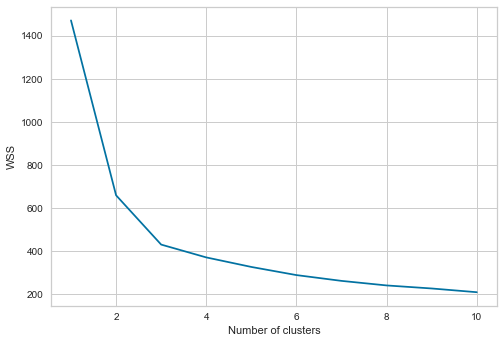

In [238]:
plt.plot(range(1,11), wss)
plt.xlabel("Number of clusters")
plt.ylabel("WSS")
plt.show()

In [220]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [272]:
k_means_3 = KMeans(n_clusters = 3,random_state=1)
k_means_3.fit(scaled_K_df_bank)
labels_3 = k_means_3.labels_

In [277]:
silhouette_score(scaled_K_df_bank,labels_3)


0.4909462627003621

In [278]:
k_means_4 = KMeans(n_clusters = 4,random_state=1)
k_means_4.fit(scaled_K_df_bank)
labels_4 = k_means_4.labels_

In [279]:
silhouette_score(scaled_K_df_bank,labels_4)


0.43702121109022235

In [240]:
from sklearn import metrics
scores = []
k_range = range(2, 11)

for k in k_range:
    km = KMeans(n_clusters=k, random_state=2)
    km.fit(scaled_K_df_bank)
    scores.append(metrics.silhouette_score(scaled_K_df_bank, km.labels_))
    
scores

[0.46577247686580914,
 0.40072705527512986,
 0.3347542296283262,
 0.28621461554288646,
 0.285726896652541,
 0.2756098749293962,
 0.24943558736282168,
 0.2666366921192433,
 0.2731288488219916]

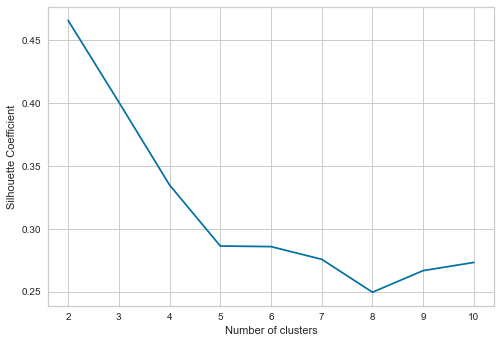

In [237]:
plt.plot(k_range,scores)
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

In [208]:
from yellowbrick.cluster import KElbowVisualizer
model = KMeans(random_state=123)



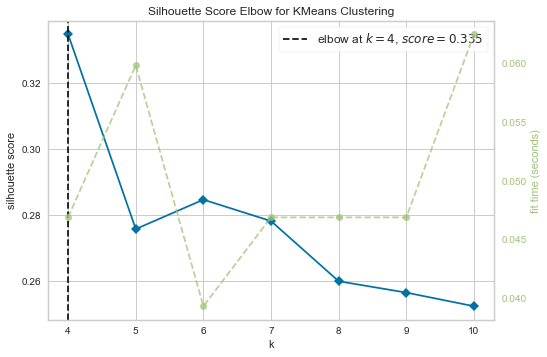

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [253]:
visualizer = KElbowVisualizer(model,k=(4,11),metric="silhouette",timing=False)
visualizer.fit(scaled_K_df_bank)
visualizer.poof()

In [297]:
###Appending cluster labels to original df
df_bank["Clus_kmeans4"] = labels_4
df_bank.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Clus_kmeans4
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,0
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,3
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,0
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,1
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,0


In [303]:
###Appending cluster labels to original df
df_bank["Clus_kmeans3"] = labels_3
df_bank.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Clus_kmeans4,Clus_kmeans3
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,0,1
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,3,0
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,0,1
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,1,2
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,0,1


In [304]:
kmeans_mean_cluster = pd.DataFrame(round(df_bank.groupby('Clus_kmeans3').mean(),1))
kmeans_mean_cluster

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Clus_kmeans4
Clus_kmeans3,,,,,,,,
0,14.0,14.1,0.9,5.4,3.2,2.7,5.0,2.9
1,18.2,16.1,0.9,6.1,3.7,3.6,6.0,0.7
2,11.9,13.3,0.8,5.2,2.8,4.9,5.1,1.0


In [306]:
kmeans_mean_cluster.T

Clus_kmeans3,0,1,2
spending,14.0,18.2,11.9
advance_payments,14.1,16.1,13.3
probability_of_full_payment,0.9,0.9,0.8
current_balance,5.4,6.1,5.2
credit_limit,3.2,3.7,2.8
min_payment_amt,2.7,3.6,4.9
max_spent_in_single_shopping,5.0,6.0,5.1
Clus_kmeans4,2.9,0.7,1.0


### 1.5 Cluster Profiling

In [295]:
### 3 group cluster profile for hierarchical clustering

aggdata.T

clusters_avg,1,2,3
spending,18.371429,14.199041,11.872388
advance_payments,16.145429,14.233562,13.257015
probability_of_full_payment,0.884400,0.879190,0.848072
current_balance,6.158171,5.478233,5.238940
credit_limit,3.684629,3.226452,2.848537
min_payment_amt,3.639157,2.612181,4.949433
max_spent_in_single_shopping,6.017371,5.086178,5.122209
Clus_kmeans4,1.300000,0.287671,2.820896
Freq,70.000000,73.000000,67.000000


In [307]:
### 3 group cluster profile for k-means clustering

kmeans_mean_cluster.T

Clus_kmeans3,0,1,2
spending,14.0,18.2,11.9
advance_payments,14.1,16.1,13.3
probability_of_full_payment,0.9,0.9,0.8
current_balance,5.4,6.1,5.2
credit_limit,3.2,3.7,2.8
min_payment_amt,2.7,3.6,4.9
max_spent_in_single_shopping,5.0,6.0,5.1
Clus_kmeans4,2.9,0.7,1.0


# 2. RF_CART_ANN

## 2.1 Exploratory Data Analysis

In [308]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
# Import stats from scipy
from scipy import stats

In [309]:
df = pd.read_csv("insurance_part2_data.csv")

In [311]:
df.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,C2B,Airlines,No,0.70,Online,7,2.51,Customised Plan,ASIA
1,36,EPX,Travel Agency,No,0.00,Online,34,20.00,Customised Plan,ASIA
2,39,CWT,Travel Agency,No,5.94,Online,3,9.90,Customised Plan,Americas
3,36,EPX,Travel Agency,No,0.00,Online,4,26.00,Cancellation Plan,ASIA
4,33,JZI,Airlines,No,6.30,Online,53,18.00,Bronze Plan,ASIA


In [312]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           3000 non-null   int64  
 1   Agency_Code   3000 non-null   object 
 2   Type          3000 non-null   object 
 3   Claimed       3000 non-null   object 
 4   Commision     3000 non-null   float64
 5   Channel       3000 non-null   object 
 6   Duration      3000 non-null   int64  
 7   Sales         3000 non-null   float64
 8   Product Name  3000 non-null   object 
 9   Destination   3000 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 234.5+ KB


In [313]:
df.shape

(3000, 10)

In [314]:
df.isnull().sum()

Age             0
Agency_Code     0
Type            0
Claimed         0
Commision       0
Channel         0
Duration        0
Sales           0
Product Name    0
Destination     0
dtype: int64

In [315]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,3000.0,38.091000,10.463518,8.0,32.0,36.00,42.000,84.00
Commision,3000.0,14.529203,25.481455,0.0,0.0,4.63,17.235,210.21
Duration,3000.0,70.001333,134.053313,-1.0,11.0,26.50,63.000,4580.00
Sales,3000.0,60.249913,70.733954,0.0,20.0,33.00,69.000,539.00


In [316]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,3000.0,NaN,NaN,NaN,38.091,10.463518,8.0,32.0,36.0,42.0,84.0
Agency_Code,3000,4,EPX,1365,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Type,3000,2,Travel Agency,1837,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Claimed,3000,2,No,2076,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Commision,3000.0,NaN,NaN,NaN,14.529203,25.481455,0.0,0.0,4.63,17.235,210.21
Channel,3000,2,Online,2954,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Duration,3000.0,NaN,NaN,NaN,70.001333,134.053313,-1.0,11.0,26.5,63.0,4580.0
Sales,3000.0,NaN,NaN,NaN,60.249913,70.733954,0.0,20.0,33.0,69.0,539.0
Product Name,3000,5,Customised Plan,1136,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Destination,3000,3,ASIA,2465,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [318]:
df.columns

Index(['Age', 'Agency_Code', 'Type', 'Claimed', 'Commision', 'Channel',
       'Duration', 'Sales', 'Product Name', 'Destination'],
      dtype='object')

In [321]:

### Getting unique count of all nominal variables

for column in df[['Agency_Code', 'Type', 'Claimed', 'Channel',
        'Product Name', 'Destination']]:
    print(column.upper(),': ',df[column].nunique())
    print(df[column].value_counts().sort_values())
    print('\n')

AGENCY_CODE :  4
JZI     239
CWT     472
C2B     924
EPX    1365
Name: Agency_Code, dtype: int64


TYPE :  2
Airlines         1163
Travel Agency    1837
Name: Type, dtype: int64


CLAIMED :  2
Yes     924
No     2076
Name: Claimed, dtype: int64


CHANNEL :  2
Offline      46
Online     2954
Name: Channel, dtype: int64


PRODUCT NAME :  5
Gold Plan             109
Silver Plan           427
Bronze Plan           650
Cancellation Plan     678
Customised Plan      1136
Name: Product Name, dtype: int64


DESTINATION :  3
EUROPE       215
Americas     320
ASIA        2465
Name: Destination, dtype: int64




In [324]:
duplicates = df.duplicated()

In [328]:
df[duplicates]

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
63,30,C2B,Airlines,Yes,15.0,Online,27,60.0,Bronze Plan,ASIA
329,36,EPX,Travel Agency,No,0.0,Online,5,20.0,Customised Plan,ASIA
407,36,EPX,Travel Agency,No,0.0,Online,11,19.0,Cancellation Plan,ASIA
411,35,EPX,Travel Agency,No,0.0,Online,2,20.0,Customised Plan,ASIA
422,36,EPX,Travel Agency,No,0.0,Online,5,20.0,Customised Plan,ASIA
...,...,...,...,...,...,...,...,...,...,...
2940,36,EPX,Travel Agency,No,0.0,Online,8,10.0,Cancellation Plan,ASIA
2947,36,EPX,Travel Agency,No,0.0,Online,10,28.0,Customised Plan,ASIA
2952,36,EPX,Travel Agency,No,0.0,Online,2,10.0,Cancellation Plan,ASIA
2962,36,EPX,Travel Agency,No,0.0,Online,4,20.0,Customised Plan,ASIA


In [329]:
df.columns

Index(['Age', 'Agency_Code', 'Type', 'Claimed', 'Commision', 'Channel',
       'Duration', 'Sales', 'Product Name', 'Destination'],
      dtype='object')

### Univariate anaylsis

In [ ]:
### Numeric Variables

C:\Users\rakes\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\rakes\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\rakes\anaconda3\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\rakes\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and 

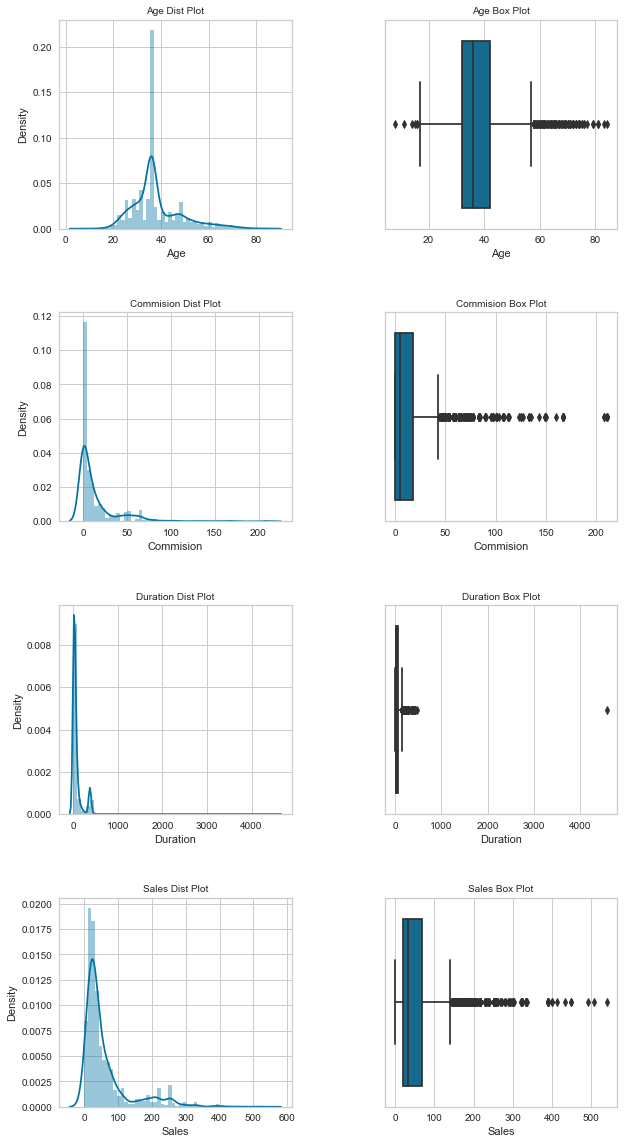

In [333]:
fig , axes= plt.subplots(nrows=4,ncols=2)
plt.subplots_adjust(wspace=0.4,
                   hspace = 0.4)
fig.set_size_inches(10, 20)

Age = sns.distplot(df['Age'],ax=axes[0][0])
Age.set_title("Age Dist Plot", fontsize = 10)
Age = sns.boxplot(df['Age'], orient = "v",ax=axes[0][1])
Age.set_title("Age Box Plot", fontsize = 10)

Commision = sns.distplot(df['Commision'],ax=axes[1][0])
Commision.set_title("Commision Dist Plot", fontsize = 10)
Commision = sns.boxplot(df['Commision'], orient = "v",ax=axes[1][1])
Commision.set_title("Commision Box Plot", fontsize = 10)

Duration = sns.distplot(df['Duration'],ax=axes[2][0])
Duration.set_title("Duration Dist Plot", fontsize = 10)
Duration = sns.boxplot(df['Duration'], orient = "v",ax=axes[2][1])
Duration.set_title("Duration Box Plot", fontsize = 10)

Sales = sns.distplot(df['Sales'],ax=axes[3][0])
Sales.set_title("Sales Dist Plot", fontsize = 10)
Sales = sns.boxplot(df['Sales'], orient = "v",ax=axes[3][1])
Sales.set_title("Sales Box Plot", fontsize = 10)

plt.show()

In [ ]:
### Categorical variables

In [357]:
df.columns

Index(['Age', 'Agency_Code', 'Type', 'Claimed', 'Commision', 'Channel',
       'Duration', 'Sales', 'Product Name', 'Destination'],
      dtype='object')

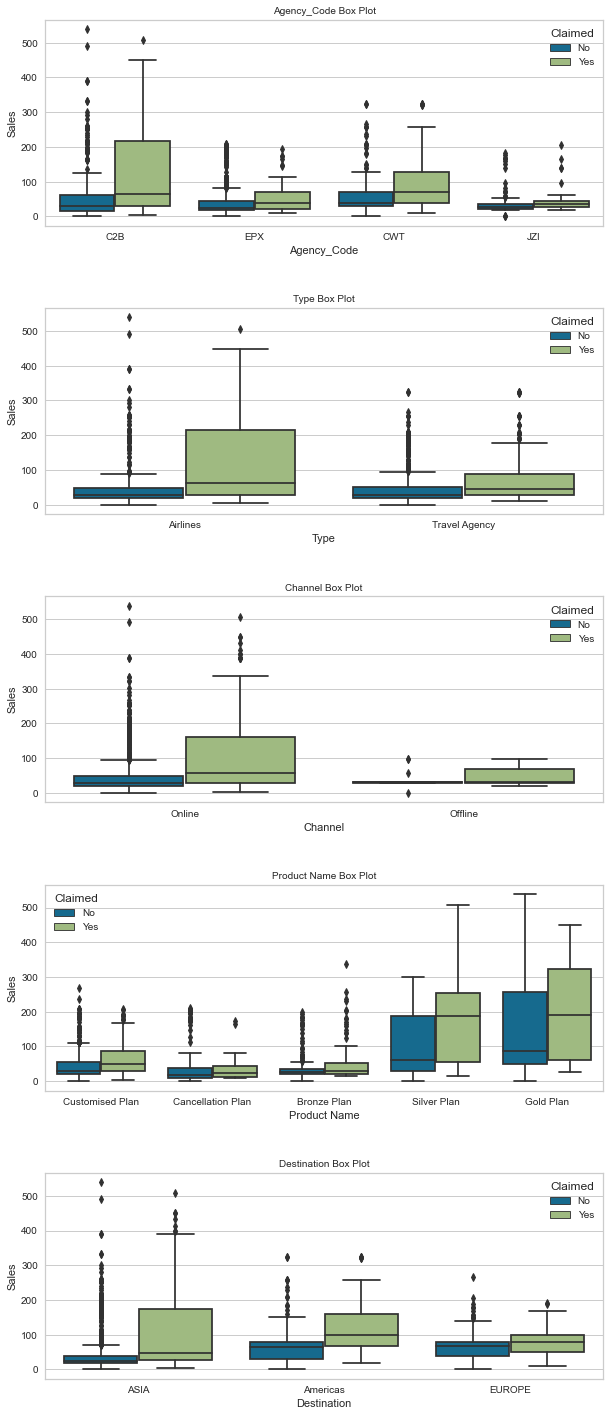

In [363]:
fig , axes= plt.subplots(nrows=5)
plt.subplots_adjust(wspace=0.4,
                   hspace = 0.4)
fig.set_size_inches(10, 25)

Agency_Code = sns.boxplot(x = df['Agency_Code'],y = df['Sales'], hue = df['Claimed'], ax=axes[0])
Agency_Code.set_title("Agency_Code Box Plot", fontsize = 10)

Type = sns.boxplot(x = df['Type'],y = df['Sales'], hue = df['Claimed'], ax=axes[1])
Type.set_title("Type Box Plot", fontsize = 10)

Channel = sns.boxplot(x = df['Channel'],y = df['Sales'], hue = df['Claimed'], ax=axes[2])
Channel.set_title("Channel Box Plot", fontsize = 10)

Product_Name = sns.boxplot(x = df['Product Name'],y = df['Sales'], hue = df['Claimed'], ax=axes[3])
Product_Name.set_title("Product Name Box Plot", fontsize = 10)

Destination = sns.boxplot(x = df['Destination'],y = df['Sales'], hue = df['Claimed'], ax=axes[4])
Destination.set_title("Destination Box Plot", fontsize = 10)

plt.show()

In [339]:
df.columns

Index(['Age', 'Agency_Code', 'Type', 'Claimed', 'Commision', 'Channel',
       'Duration', 'Sales', 'Product Name', 'Destination'],
      dtype='object')

<AxesSubplot:xlabel='Agency_Code', ylabel='Sales'>

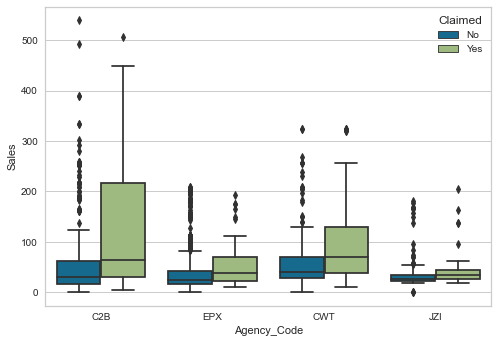

In [341]:
sns.boxplot(data = df, x='Agency_Code',y='Sales', hue='Claimed')

<AxesSubplot:xlabel='Type', ylabel='Sales'>

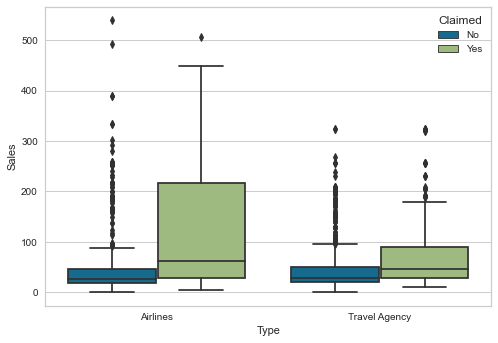

In [342]:
sns.boxplot(data = df, x='Type',y='Sales', hue='Claimed')

<AxesSubplot:xlabel='Claimed', ylabel='Sales'>

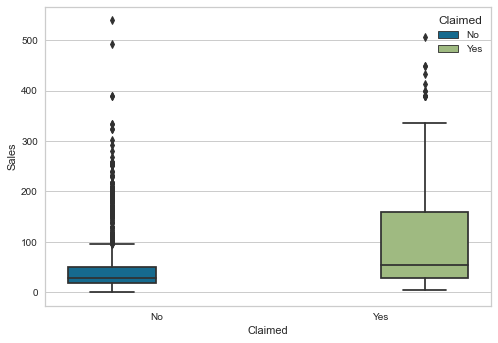

In [343]:
sns.boxplot(data = df, x='Claimed',y='Sales', hue='Claimed')

<AxesSubplot:xlabel='Channel', ylabel='Sales'>

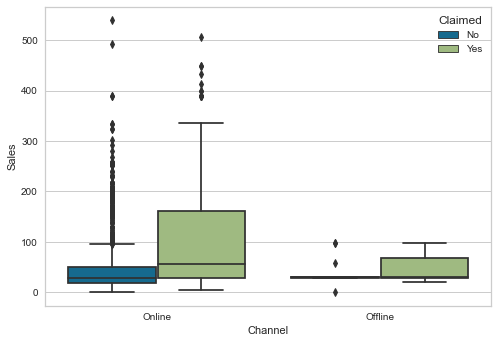

In [345]:
sns.boxplot(data = df, x='Channel',y='Sales', hue='Claimed')

<AxesSubplot:xlabel='Product Name', ylabel='Sales'>

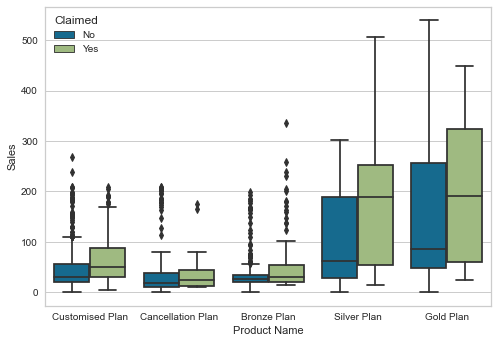

In [347]:
sns.boxplot(data = df, x='Product Name',y='Sales', hue='Claimed')

<AxesSubplot:xlabel='Destination', ylabel='Sales'>

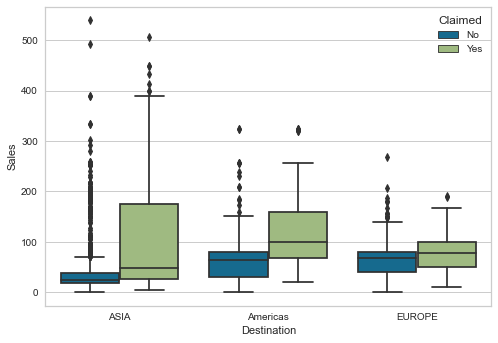

In [365]:
sns.boxplot(data = df, x='Destination',y='Sales', hue='Claimed')

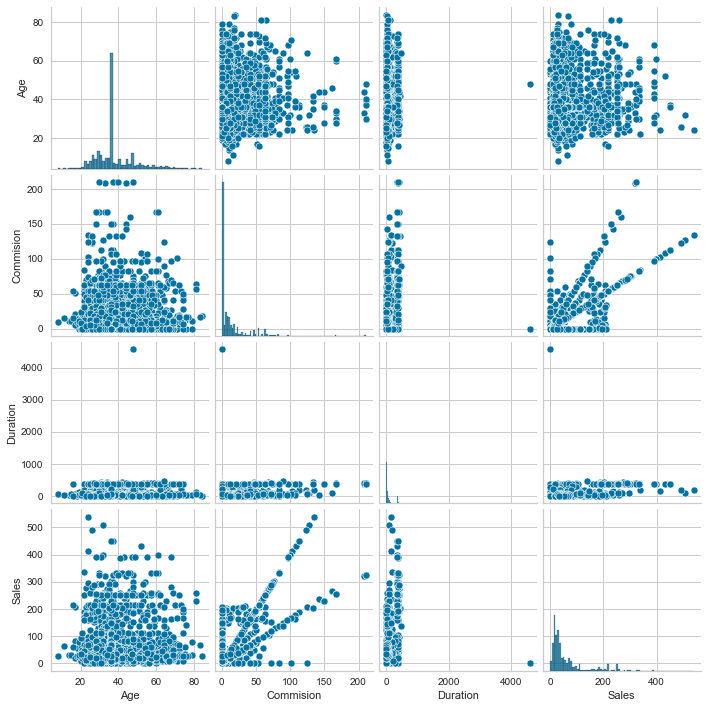

In [366]:
sns.pairplot(df)

# sns.pairplot(df[['Age', 'Commision', 
#     'Duration', 'Sales']])

<AxesSubplot:>

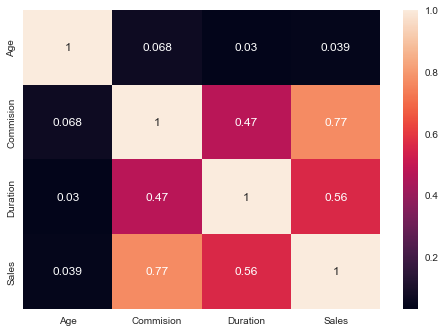

In [367]:
sns.heatmap(df.corr(), annot=True)

In [ ]:
# Converting all objects to categorical codes

In [368]:
for feature in df.columns: 
    if df[feature].dtype == 'object': 
        print('\n')
        print('feature:',feature)
        print(pd.Categorical(df[feature].unique()))
        print(pd.Categorical(df[feature].unique()).codes)
        df[feature] = pd.Categorical(df[feature]).codes



feature: Agency_Code
['C2B', 'EPX', 'CWT', 'JZI']
Categories (4, object): ['C2B', 'CWT', 'EPX', 'JZI']
[0 2 1 3]


feature: Type
['Airlines', 'Travel Agency']
Categories (2, object): ['Airlines', 'Travel Agency']
[0 1]


feature: Claimed
['No', 'Yes']
Categories (2, object): ['No', 'Yes']
[0 1]


feature: Channel
['Online', 'Offline']
Categories (2, object): ['Offline', 'Online']
[1 0]


feature: Product Name
['Customised Plan', 'Cancellation Plan', 'Bronze Plan', 'Silver Plan', 'Gold Plan']
Categories (5, object): ['Bronze Plan', 'Cancellation Plan', 'Customised Plan', 'Gold Plan', 'Silver Plan']
[2 1 0 4 3]


feature: Destination
['ASIA', 'Americas', 'EUROPE']
Categories (3, object): ['ASIA', 'Americas', 'EUROPE']
[0 1 2]


In [369]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           3000 non-null   int64  
 1   Agency_Code   3000 non-null   int8   
 2   Type          3000 non-null   int8   
 3   Claimed       3000 non-null   int8   
 4   Commision     3000 non-null   float64
 5   Channel       3000 non-null   int8   
 6   Duration      3000 non-null   int64  
 7   Sales         3000 non-null   float64
 8   Product Name  3000 non-null   int8   
 9   Destination   3000 non-null   int8   
dtypes: float64(2), int64(2), int8(6)
memory usage: 111.5 KB


In [370]:
### Proportion of 1's and 0's

df.Claimed.value_counts(normalize=True)

0    0.692
1    0.308
Name: Claimed, dtype: float64

## 2.2


## Extracting the target column into separate vectors for training set and test set


In [371]:
X = df.drop("Claimed", axis=1)

y = df.pop("Claimed")

X.head()

,Age,Agency_Code,Type,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,0,0,0.70,1,7,2.51,2,0
1,36,2,1,0.00,1,34,20.00,2,0
2,39,1,1,5.94,1,3,9.90,2,1
3,36,2,1,0.00,1,4,26.00,1,0
4,33,3,0,6.30,1,53,18.00,0,0


In [374]:
# Scaling

from scipy.stats import zscore
X_scaled=X.apply(zscore)
X_scaled.head()

,Age,Agency_Code,Type,Commision,Channel,Duration,Sales,Product Name,Destination
0,0.947162,-1.314358,-1.256796,-0.542807,0.124788,-0.470051,-0.816433,0.268835,-0.434646
1,-0.199870,0.697928,0.795674,-0.570282,0.124788,-0.268605,-0.569127,0.268835,-0.434646
2,0.086888,-0.308215,0.795674,-0.337133,0.124788,-0.499894,-0.711940,0.268835,1.303937
3,-0.199870,0.697928,0.795674,-0.570282,0.124788,-0.492433,-0.484288,-0.525751,-0.434646
4,-0.486629,1.704071,-1.256796,-0.323003,0.124788,-0.126846,-0.597407,-1.320338,-0.434646


In [376]:
# Splitting the data into train and test

from sklearn.model_selection import train_test_split

X_train, X_test, train_labels, test_labels = train_test_split(X_scaled, y, test_size=.30, random_state=1)

In [377]:
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('train_labels',train_labels.shape)
print('test_labels',test_labels.shape)

X_train (2100, 9)
X_test (900, 9)
train_labels (2100,)
test_labels (900,)


## Decision Tree Classifier

In [378]:
param_grid = {
    'criterion': ['gini'],
    'max_depth': [4.85, 4.90,4.95, 5.0,5.05,5.10,5.15],
    'min_samples_leaf': [40, 41, 42, 43, 44], 
    'min_samples_split': [150, 175, 200, 210, 220, 230, 240, 250, 260, 270],
}

dtcl = DecisionTreeClassifier(random_state=1)

grid_search = GridSearchCV(estimator = dtcl, param_grid = param_grid, cv = 10)

In [380]:
grid_search.fit(X_train, train_labels)


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=1),
             param_grid={'criterion': ['gini'],
                         'max_depth': [4.85, 4.9, 4.95, 5.0, 5.05, 5.1, 5.15],
                         'min_samples_leaf': [40, 41, 42, 43, 44],
                         'min_samples_split': [150, 175, 200, 210, 220, 230,
                                               240, 250, 260, 270]})

In [382]:
print(grid_search.best_params_)


{'criterion': 'gini', 'max_depth': 5.0, 'min_samples_leaf': 42, 'min_samples_split': 200}


In [384]:
best_grid = grid_search.best_estimator_
best_grid

DecisionTreeClassifier(max_depth=5.0, min_samples_leaf=42,
                       min_samples_split=200, random_state=1)

In [385]:
train_char_label = ['no', 'yes']
tree_regularized = open('tree_regularized.dot','w')
dot_data = tree.export_graphviz(best_grid, out_file= tree_regularized , feature_names = list(X_train), class_names = list(train_char_label))

tree_regularized.close()
dot_data

In [387]:
#Variable Importance

print (pd.DataFrame(best_grid.feature_importances_, columns = ["Imp"], 
                    index = X_train.columns).sort_values('Imp',ascending=False))

                   Imp
Agency_Code   0.604561
Sales         0.254851
Product Name  0.055097
Duration      0.036387
Age           0.026631
Commision     0.022472
Type          0.000000
Channel       0.000000
Destination   0.000000


In [ ]:
# Predicting on Train and Test

In [390]:
ytrain_predict = best_grid.predict(X_train)
ytest_predict = best_grid.predict(X_test)

In [391]:
# Get the predicted classes and probabilities

ytest_predict
ytest_predict_prob=best_grid.predict_proba(X_test)
ytest_predict_prob
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.935714,0.064286
1,0.394089,0.605911
2,0.394089,0.605911
3,0.311111,0.688889
4,0.927586,0.072414


### Random Forest Classifier

In [394]:
param_grid_rfcl = {
    'max_depth': [4,5,6],#20,30,40
    'max_features': [2,3,4,5],## 7,8,9
    'min_samples_leaf': [8,9,11,15],## 50,100
    'min_samples_split': [46,50,55], ## 60,70
    'n_estimators': [290,350,400] ## 100,200
}

rfcl = RandomForestClassifier(random_state=1)

grid_search_rfcl = GridSearchCV(estimator = rfcl, param_grid = param_grid_rfcl, cv = 5)

In [395]:
grid_search_rfcl.fit(X_train, train_labels)
print(grid_search_rfcl.best_params_)
best_grid_rfcl = grid_search_rfcl.best_estimator_
best_grid_rfcl

{'max_depth': 6, 'max_features': 5, 'min_samples_leaf': 9, 'min_samples_split': 46, 'n_estimators': 290}


RandomForestClassifier(max_depth=6, max_features=5, min_samples_leaf=9,
                       min_samples_split=46, n_estimators=290, random_state=1)

In [403]:
grid_search_rfcl

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1),
             param_grid={'max_depth': [4, 5, 6], 'max_features': [2, 3, 4, 5],
                         'min_samples_leaf': [8, 9, 11, 15],
                         'min_samples_split': [46, 50, 55],
                         'n_estimators': [290, 350, 400]})

In [397]:
# Train and test data predict

ytrain_predict_rfcl = best_grid_rfcl.predict(X_train)
ytest_predict_rfcl = best_grid_rfcl.predict(X_test)

In [398]:
# Prediction classes and probabilities

ytest_predict_rfcl
ytest_predict_prob_rfcl=best_grid_rfcl.predict_proba(X_test)
ytest_predict_prob_rfcl
pd.DataFrame(ytest_predict_prob_rfcl).head()

,0,1
0,0.750891,0.249109
1,0.477810,0.522190
2,0.455781,0.544219
3,0.250311,0.749689
4,0.935500,0.064500


In [399]:
# Variable Importance
print (pd.DataFrame(best_grid_rfcl.feature_importances_, 
                    columns = ["Imp"], 
                    index = X_train.columns).sort_values('Imp',ascending=False))

                   Imp
Agency_Code   0.353930
Product Name  0.201006
Sales         0.167986
Commision     0.107705
Duration      0.071311
Age           0.052319
Type          0.038278
Destination   0.006493
Channel       0.000972


## ANN Classifier

In [400]:
param_grid_nncl = {
    'hidden_layer_sizes': [50,100,200], # 50, 200
    'max_iter': [2500,3000,4000], #5000,2500
    'solver': ['adam'], #sgd
    'tol': [0.01], 
}

nncl = MLPClassifier(random_state=1)

grid_search_nncl = GridSearchCV(estimator = nncl, param_grid = param_grid_nncl, cv = 10)

In [402]:
grid_search_nncl

GridSearchCV(cv=10, estimator=MLPClassifier(random_state=1),
             param_grid={'hidden_layer_sizes': [50, 100, 200],
                         'max_iter': [2500, 3000, 4000], 'solver': ['adam'],
                         'tol': [0.01]})

In [404]:
grid_search_nncl.fit(X_train, train_labels)
grid_search_nncl.best_params_
best_grid_nncl = grid_search_nncl.best_estimator_
best_grid_nncl

MLPClassifier(hidden_layer_sizes=200, max_iter=2500, random_state=1, tol=0.01)

In [406]:
grid_search_nncl.best_params_


{'hidden_layer_sizes': 200, 'max_iter': 2500, 'solver': 'adam', 'tol': 0.01}

In [407]:
# Train and test prediction

ytrain_predict_nncl = best_grid_nncl.predict(X_train)
ytest_predict_nncl = best_grid_nncl.predict(X_test)

In [408]:
# Predicted classes and probabilities

ytest_predict_nncl
ytest_predict_prob_nncl=best_grid_nncl.predict_proba(X_test)
ytest_predict_prob_nncl
pd.DataFrame(ytest_predict_prob_nncl).head()

,0,1
0,0.829737,0.170263
1,0.624472,0.375528
2,0.527335,0.472665
3,0.325167,0.674833
4,0.923836,0.076164


# 2.3 Performance Metrics

AUC: 0.835


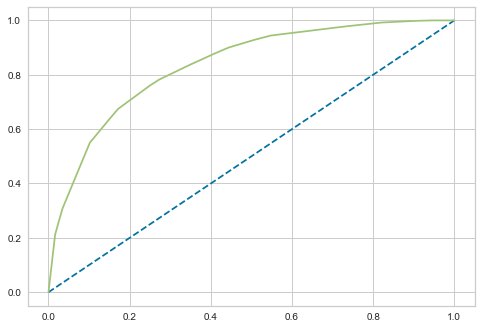

In [409]:
# CART - AUC and ROC for the training data

# predict probabilities
probs = best_grid.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
cart_train_auc = roc_auc_score(train_labels, probs)
print('AUC: %.3f' % cart_train_auc)
# calculate roc curve
cart_train_fpr, cart_train_tpr, cart_train_thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(cart_train_fpr, cart_train_tpr)

AUC: 0.792


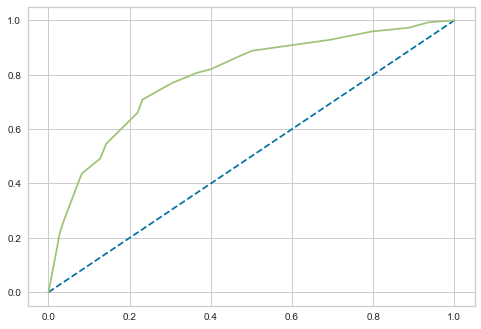

In [410]:
# CART - AUC and ROC for the test data

# predict probabilities
probs_cart = best_grid.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs_cart = probs_cart[:, 1]
# calculate AUC
cart_test_auc = roc_auc_score(test_labels, probs_cart)
print('AUC: %.3f' % cart_test_auc)
# calculate roc curve
cart_test_fpr, cart_test_tpr, cart_testthresholds = roc_curve(test_labels, probs_cart)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(cart_test_fpr, cart_test_tpr)

In [411]:
# Confusion Matrix for train data

confusion_matrix(train_labels, ytrain_predict)

array([[1321,  150],
       [ 283,  346]], dtype=int64)

In [412]:
#Train Data Accuracy

cart_train_acc=best_grid.score(X_train,train_labels) 
cart_train_acc

0.7938095238095239

In [413]:
print(classification_report(train_labels, ytrain_predict))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86      1471
           1       0.70      0.55      0.62       629

    accuracy                           0.79      2100
   macro avg       0.76      0.72      0.74      2100
weighted avg       0.79      0.79      0.79      2100



In [414]:
cart_metrics=classification_report(train_labels, ytrain_predict,output_dict=True)
df=pd.DataFrame(cart_metrics).transpose()
cart_train_f1=round(df.loc["1"][2],2)
cart_train_recall=round(df.loc["1"][1],2)
cart_train_precision=round(df.loc["1"][0],2)
print ('cart_train_precision ',cart_train_precision)
print ('cart_train_recall ',cart_train_recall)
print ('cart_train_f1 ',cart_train_f1)

cart_train_precision  0.7
cart_train_recall  0.55
cart_train_f1  0.62


In [415]:
# Confusion matrix for test data

confusion_matrix(test_labels, ytest_predict)

array([[555,  50],
       [166, 129]], dtype=int64)

In [417]:
#Test Data Accuracy
cart_test_acc=best_grid.score(X_test,test_labels)
cart_test_acc

0.76

In [418]:
# classification report

print(classification_report(test_labels, ytest_predict))

              precision    recall  f1-score   support

           0       0.77      0.92      0.84       605
           1       0.72      0.44      0.54       295

    accuracy                           0.76       900
   macro avg       0.75      0.68      0.69       900
weighted avg       0.75      0.76      0.74       900



In [419]:
cart_metrics=classification_report(test_labels, ytest_predict,output_dict=True)
df=pd.DataFrame(cart_metrics).transpose()
cart_test_precision=round(df.loc["1"][0],2)
cart_test_recall=round(df.loc["1"][1],2)
cart_test_f1=round(df.loc["1"][2],2)
print ('cart_test_precision ',cart_test_precision)
print ('cart_test_recall ',cart_test_recall)
print ('cart_test_f1 ',cart_test_f1)

cart_test_precision  0.72
cart_test_recall  0.44
cart_test_f1  0.54


## RF Model Performance Evaluation on Training data



In [420]:
confusion_matrix(train_labels,ytrain_predict_rfcl)


array([[1321,  150],
       [ 245,  384]], dtype=int64)

In [421]:
rf_train_acc=best_grid_rfcl.score(X_train,train_labels) 
rf_train_acc

0.8119047619047619

In [422]:
print(classification_report(train_labels,ytrain_predict_rfcl))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1471
           1       0.72      0.61      0.66       629

    accuracy                           0.81      2100
   macro avg       0.78      0.75      0.77      2100
weighted avg       0.81      0.81      0.81      2100



In [423]:
rf_metrics=classification_report(train_labels, ytrain_predict_rfcl,output_dict=True)
df=pd.DataFrame(rf_metrics).transpose()
rf_train_precision=round(df.loc["1"][0],2)
rf_train_recall=round(df.loc["1"][1],2)
rf_train_f1=round(df.loc["1"][2],2)
print ('rf_train_precision ',rf_train_precision)
print ('rf_train_recall ',rf_train_recall)
print ('rf_train_f1 ',rf_train_f1)

rf_train_precision  0.72
rf_train_recall  0.61
rf_train_f1  0.66


Area under Curve is 0.8589324718808463


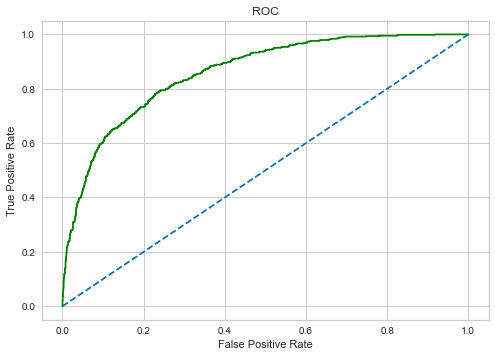

In [424]:
rf_train_fpr, rf_train_tpr,_=roc_curve(train_labels,best_grid_rfcl.predict_proba(X_train)[:,1])
plt.plot(rf_train_fpr,rf_train_tpr,color='green')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
rf_train_auc=roc_auc_score(train_labels,best_grid_rfcl.predict_proba(X_train)[:,1])
print('Area under Curve is', rf_train_auc)

### RF Model Performance Evaluation on Test data

In [425]:
confusion_matrix(test_labels,ytest_predict_rfcl)

array([[550,  55],
       [146, 149]], dtype=int64)

In [426]:
rf_test_acc=best_grid_rfcl.score(X_test,test_labels)
rf_test_acc

0.7766666666666666

In [427]:
print(classification_report(test_labels,ytest_predict_rfcl))

              precision    recall  f1-score   support

           0       0.79      0.91      0.85       605
           1       0.73      0.51      0.60       295

    accuracy                           0.78       900
   macro avg       0.76      0.71      0.72       900
weighted avg       0.77      0.78      0.76       900



In [428]:
rf_metrics=classification_report(test_labels, ytest_predict_rfcl,output_dict=True)
df=pd.DataFrame(rf_metrics).transpose()
rf_test_precision=round(df.loc["1"][0],2)
rf_test_recall=round(df.loc["1"][1],2)
rf_test_f1=round(df.loc["1"][2],2)
print ('rf_test_precision ',rf_test_precision)
print ('rf_test_recall ',rf_test_recall)
print ('rf_test_f1 ',rf_test_f1)

rf_test_precision  0.73
rf_test_recall  0.51
rf_test_f1  0.6


Area under Curve is 0.8217117243311387


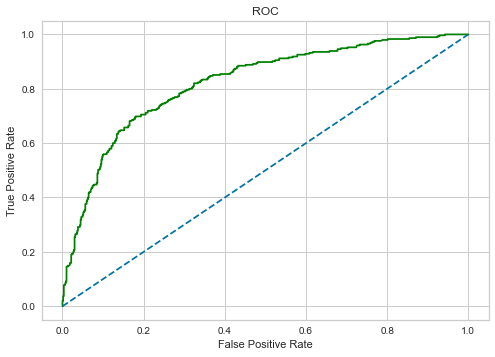

In [429]:
rf_test_fpr, rf_test_tpr,_=roc_curve(test_labels,best_grid_rfcl.predict_proba(X_test)[:,1])
plt.plot(rf_test_fpr,rf_test_tpr,color='green')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
rf_test_auc=roc_auc_score(test_labels,best_grid_rfcl.predict_proba(X_test)[:,1])
print('Area under Curve is', rf_test_auc)

# NN Model Performance Evaluation on Training data


In [438]:
confusion_matrix(train_labels,ytrain_predict_nncl)

array([[1312,  159],
       [ 311,  318]], dtype=int64)

In [431]:
nn_train_acc=best_grid_nncl.score(X_train,train_labels) 
nn_train_acc

0.7761904761904762

In [432]:
print(classification_report(train_labels,ytrain_predict_nncl))

              precision    recall  f1-score   support

           0       0.81      0.89      0.85      1471
           1       0.67      0.51      0.58       629

    accuracy                           0.78      2100
   macro avg       0.74      0.70      0.71      2100
weighted avg       0.77      0.78      0.77      2100



In [433]:
nn_metrics=classification_report(train_labels, ytrain_predict_nncl,output_dict=True)
df=pd.DataFrame(nn_metrics).transpose()
nn_train_precision=round(df.loc["1"][0],2)
nn_train_recall=round(df.loc["1"][1],2)
nn_train_f1=round(df.loc["1"][2],2)
print ('nn_train_precision ',nn_train_precision)
print ('nn_train_recall ',nn_train_recall)
print ('nn_train_f1 ',nn_train_f1)

nn_train_precision  0.67
nn_train_recall  0.51
nn_train_f1  0.58


Area under Curve is 0.8184600203834819


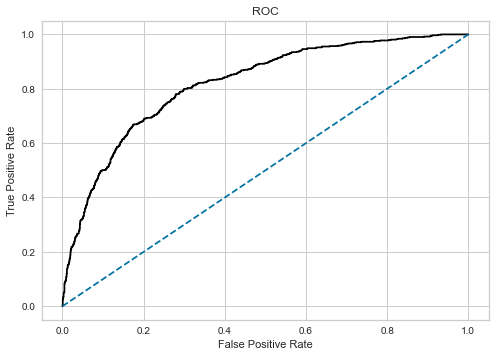

In [434]:
nn_train_fpr, nn_train_tpr,_=roc_curve(train_labels,best_grid_nncl.predict_proba(X_train)[:,1])
plt.plot(nn_train_fpr,nn_train_tpr,color='black')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
nn_train_auc=roc_auc_score(train_labels,best_grid_nncl.predict_proba(X_train)[:,1])
print('Area under Curve is', nn_train_auc)

# NN Model Performance Evaluation on Test data


In [435]:
confusion_matrix(test_labels,ytest_predict_nncl)

array([[556,  49],
       [168, 127]], dtype=int64)

In [436]:
nn_test_acc=best_grid_nncl.score(X_test,test_labels)
nn_test_acc

0.7588888888888888

In [437]:
print(classification_report(test_labels,ytest_predict_nncl))

              precision    recall  f1-score   support

           0       0.77      0.92      0.84       605
           1       0.72      0.43      0.54       295

    accuracy                           0.76       900
   macro avg       0.74      0.67      0.69       900
weighted avg       0.75      0.76      0.74       900



In [441]:
nn_metrics=classification_report(test_labels, ytest_predict_nncl,output_dict=True)
df=pd.DataFrame(nn_metrics).transpose()
nn_test_precision=round(df.loc["1"][0],2)
nn_test_recall=round(df.loc["1"][1],2)
nn_test_f1=round(df.loc["1"][2],2)
print ('nn_test_precision ',nn_test_precision)
print ('nn_test_recall ',nn_test_recall)
print ('nn_test_f1 ',nn_test_f1)

nn_test_precision  0.72
nn_test_recall  0.43
nn_test_f1  0.54


# 2.4 Final Model: Compare all the model and write an inference which model is best/optimized

In [443]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({'CART Train':[cart_train_acc,cart_train_auc,cart_train_recall,cart_train_precision,cart_train_f1],
        'CART Test':[cart_test_acc,cart_test_auc,cart_test_recall,cart_test_precision,cart_test_f1],
       'Random Forest Train':[rf_train_acc,rf_train_auc,rf_train_recall,rf_train_precision,rf_train_f1],
        'Random Forest Test':[rf_test_acc,rf_test_auc,rf_test_recall,rf_test_precision,rf_test_f1],
       'Neural Network Train':[nn_train_acc,nn_train_auc,nn_train_recall,nn_train_precision,nn_train_f1],
        'Neural Network Test':[nn_test_acc,nn_test_auc,nn_test_recall,nn_test_precision,nn_test_f1]},index=index)
round(data,2)

,CART Train,CART Test,Random Forest Train,Random Forest Test,Neural Network Train,Neural Network Test
Accuracy,0.79,0.76,0.81,0.78,0.78,0.76
AUC,0.84,0.79,0.86,0.82,0.82,0.80
Recall,0.55,0.44,0.61,0.51,0.51,0.43
Precision,0.70,0.72,0.72,0.73,0.67,0.72
F1 Score,0.62,0.54,0.66,0.60,0.58,0.54


### ROC Curve for the 3 models on the Training data

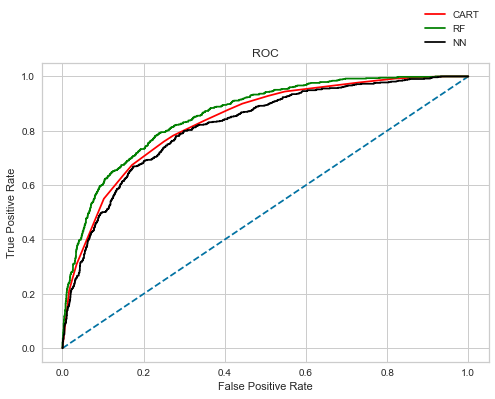

In [444]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(cart_train_fpr, cart_train_tpr,color='red',label="CART")
plt.plot(rf_train_fpr,rf_train_tpr,color='green',label="RF")
plt.plot(nn_train_fpr,nn_train_tpr,color='black',label="NN")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

### ROC Curve for the 3 models on the Test data

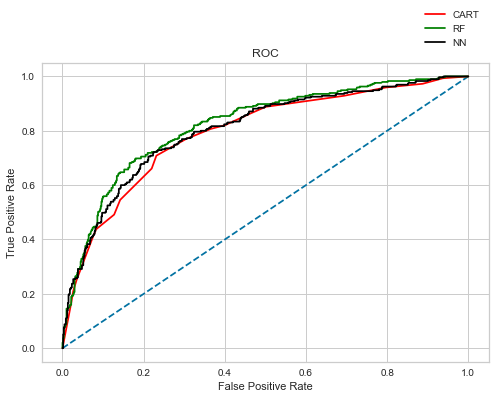

In [445]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(cart_test_fpr, cart_test_tpr,color='red',label="CART")
plt.plot(rf_test_fpr,rf_test_tpr,color='green',label="RF")
plt.plot(nn_test_fpr,nn_test_tpr,color='black',label="NN")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')